# Differential event rate


$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi m_N} \int_{v_\text{min}}^{v_\text{max}} v f(v) \frac{d\sigma}{dE_R} dv
$$

The differential event rate gives the number of expected events per kg material per a unit energy and is of essential importance for direct dark matter detections. It predicts what a possible signal would look like in a detector.

## Velocity density distribution 

The three dimensional velocity function follows a Maxwell function
$$
f_{gal}(\textbf{v}) = \frac{1}{\sqrt{2 \pi}\sigma_{v}} \exp \left(\frac{-|\textbf{v}|^2 } {2\sigma_{v}^2}\right)
$$

However, this assumes a static reference frame. In reality the detector is located on the Earth, which rotates, orbits the Sun and moves with the Sun through the Galaxy. This influences the velocity distribution observed at Earth. Since most Dark Matter direct detectors measure for a long time, it is a reasonable approximation to look at just the movement of the Sun through the Galaxy, which is $v_\text{Earth} = 220 \pm 20$ km/s. [1]

$$
 f(\mathbf{v}) = f_\text{Gal}(\mathbf{v}-\mathbf{v}_\text{Earth})
$$

Furthermore, the current detectors are not direction dependent. Therefore, the velocity distribution can be rewritten as a speed distribution. For the uncorrected veloctiy function this becomes:

$$
 f_{gal}(v) \text{ ~ } v^2 \exp \left(\frac{-|v|^2}{2\sigma_{v}^2} \right)
$$

Once we introduce the correction of the earth the calculation becomes more complex. 

$$
 f(v) = \int\int d\theta  \frac{1}{\sqrt{2 \pi}\sigma_v}\exp \left( \frac{-|\textbf{v}-\textbf{v}_\text{Earth}|}{2\sigma_v^2} \right) d\cos\theta 
$$

$$
 f(v) = \int\int d\theta  \frac{1}{\sqrt{2 \pi}\sigma_v}\exp \left( \frac{-v^2-v_\text{Earth}^2+2v_\text{Earth}v\cos \theta}{2\sigma_v^2} \right) d\cos\theta 
$$

$$
f(v) =2 \pi \frac{1}{\sqrt{2 \pi}\sigma_v}v^2\exp \left( \frac{-v^2-v_\text{Earth}^2}{2\sigma_v^2} \right) \int \exp \left( \frac{2 v_\text{Earth}v \cos \theta}{2 \sigma_v^2}  \right) d\cos \theta
$$

If we wish to contnue we have to look at the limits for the $\cos \theta$ integration. 

<b>Insert integration limit </b>

This results in the Standard Halo Model, where the slope of the higher energy particles extends further compared to a gaussian. 

$$
f(v) = 0, \quad \quad \mbox{if } v>v_\text{esc}+v_e 
$$

$$
f(v) = \frac{v}{\sqrt{2 \pi}\sigma_v v_e N_\text{esc}} \left( \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] - \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right]   \right), \quad \mbox{if } v<v_\text{esc}-v_e
$$

$$
f(v) = \frac{v}{\sqrt{2 \pi}\sigma_v v_e N_\text{esc}} \left( \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] - \exp \left[-\frac{v_\text{esc}^2}{2\sigma_v^2} \right]   \right), \quad \mbox{Otherwise.}
$$


[1] F. J. Kerr and D. Lynden-Bell, “Review of galactic constants,” Mon. Not. Roy. Astron. Soc., vol. 221, p. 1023, 1986.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special,integrate
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
velocity = np.linspace(0,2000,1000)
sigma = 270.  #km/s
v_esc = 550.
v_e = 220.

In [3]:
def N_esc(v_esc, sigma):
    a = v_esc**2/(2*sigma**2)
    return special.erf(np.sqrt(a))  - np.sqrt(2/np.pi) * v_esc/sigma *np.exp(-a)

In [4]:
def speed_dist(v, v_e, v_esc, sigma):
    factor = v / (np.sqrt(np.pi*2)*sigma*v_e*N_esc(v_esc, sigma))
    
    if v > v_esc+v_e:
        return 0 
    elif v < v_esc-v_e:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-(v+v_e)**2/(2*sigma**2)))
    else:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-v_esc**2/(2*sigma**2)))

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


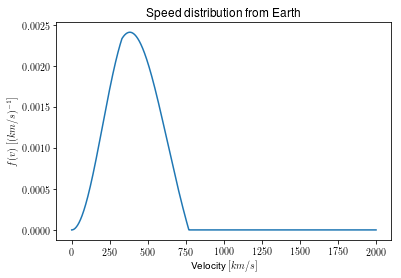

In [49]:
plt.plot(velocity, [speed_dist(i, v_e, v_esc, sigma) for i in velocity])
plt.title(r"Speed distribution from Earth")
plt.ylabel(r"$f(v)\ [(km/s)^{-1}]$")
plt.xlabel(r"Velocity $[km/s]$")
plt.show()

## Interaction cross section

The interaction cross section can be split into an spin-dependent and spin-independent. We will first look at the spin-independent part.

$$
 \frac{d\sigma}{dE_R} = \frac{d\sigma_\text{SD}}{dE_R} + \frac{d\sigma_\text{SI}}{dE_R}
$$

Assuming the interaction strength of the neutron-DM and proton-DM is the same, the spin-independent part can be written as: 

$$
\frac{d\sigma_\text{SI}}{dE_R} = \frac{m_N \sigma_p^\text{SI}}{2\mu_{\chi p}^2 v^2} A^2 F^2_\text{SI}(E_R),
$$
where 

- $m_N$: the mass of the nucleus
- $\sigma_p^\text{SI}$: the interaction strength at zero momentum
- $\mu_{\chi p}$ the reduced mass of the proton-WIMP system ($=\frac{m_\chi m_p}{m_\chi+m_p}$)
- $A$ the atomic mass number of the target
- $F$ the form factor correction

## Form Factor

Due to the particle wavelength being smaller than the radius of the proton, the cross section has to be corrected to be smaller. This is done using a parametrisation: the Helm form. 

$$
F^2_\text{SI}(E_R) = \left[ \frac{3 j_1(qR_1)}{qR_1}\right]^2 e^{-q^2 s^2}
$$
with 
$$
q = \sqrt{2 m_N E_R}, 
$$
and R_1 comes from spectroscopy data. 

$$
R_1 = \sqrt{c^2 +\frac{7}{3}\pi^2 a^2 - 5s^2}
$$

$$
c = 1.23 A^{1/3}-0.60 \text{ fm}
$$

$$
a = 0.52 \text{ fm}
$$

$$
s = 0.9 \text{ fm}
$$


[2] B.J. Kavanagh, M Fornasa, A.M. Green, "Probing WIMP particle physics and astrophysics with direct detection and neutrino telescope data", Phys. Rev., vol. 91, issue 10  

In [6]:
def FSquared(E_R, A):
    """
    Calculate the form factor given an recoil energy and atomic mass number using the Helm parameterisation. 
    
    Input: 
    - E_R   Recoil Energy in GeV
    - A:    Atomic mass number 
    
    Output: 
    - Form Factor
    """
    m = 0.9315*A # GeV  
    s = 0.9 # fm
    a = 0.52 # fm
    c = 1.23*A**(1/3) - 0.60 # fm
    R1 = np.sqrt(c**2 + 7/3 * np.pi**2 *a**2  - 5*s**2) # fm
    R1_NU = R1/0.1975 # GeV^-1 (natural units)
    s_NU = s/0.1975 # GeV^-1 (natural units)
    q = np.sqrt(2*m*E_R) # GeV
    #print(R1_NU,s_NU,q,q*R1_NU,q**2*s_NU**2)
    j_n = special.spherical_jn(1,q*R1_NU)
    return(3*j_n/(q*R1_NU))**2 * np.exp(-q**2 *s_NU**2)


0.9074575390635281


c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


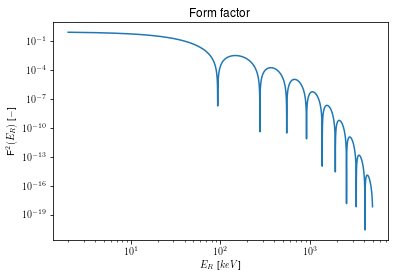

In [45]:
x=np.linspace(2E-6,5E-3,10000)
y=[FSquared(q,132) for q in x]

plt.loglog(x*1E6,y)
plt.title("Form factor")
plt.xlabel(r"$E_R$ [$keV$]")
plt.ylabel(r"F$^2(E_R)$ [$-$]")
plt.show()

If just the spin-independent part is considered the event rate can be split into a speed-dependent and speed-independent part. The speed-dependent part of the interaction rate can be rewritten as: 

$$
\eta(v_{min}) = \frac{1}{2v_e N_\text{esc}}
\begin{cases} 
    0 & \mbox{if } v_\text{min} > v_\text{esc} + v_\text{e} \\ 
    \text{erf}[\alpha_+]-\text{erf}[\alpha_-]-2\frac{v_e}{\sigma_v}\sqrt{\frac{2}{\pi}} \exp \left(-\alpha_\text{esc}^2 \right) & \mbox{if } v_\text{min} < v_\text{esc}- v_\text{e}  \\
    \text{erf}[\alpha_\text{esc}]-\text{erf}[\alpha_-] - \frac{v_\text{esc}+v_\text{e}-v_\text{min}}{\sigma_v}\sqrt{\frac{2}{\pi}}\exp \left(-\alpha_\text{esc}^2 \right) & \mbox{otherwise}
\end{cases}
$$
with 

$$
\alpha_\pm(v_\text{min}) = \frac{v_\text{min} \pm v_\text{e}}{\sqrt{2}\sigma_v} \mbox{ and } \alpha_\text{esc} = \frac{v_\text{esc}}{\sqrt{2}\sigma_v}
$$

This can also be writen as:

$$
\eta(v_\text{min}) = \frac{1}{2v_\text{e}N_\text{esc}} \left(\text{erf}[\tilde \alpha_+] - \text{erf}[\tilde \alpha_-] - \frac{2}{\sqrt{\pi}} (\tilde \alpha_+ - \tilde \alpha_-) \exp[-\alpha^2_\text{esc}] \right)
$$
where 

$$
\tilde \alpha_\pm(v_\text{min}) = min(\alpha_\pm, \alpha_\text{esc})
$$


$$
v_\text{min} = \sqrt{\frac{m_\text{N}E_R}{2\mu_{\chi N}}}
$$



In [8]:
def speed_integrated(v_min, v_esc, v_earth, sigma):
    """
    Return the value of the integrated speed distribution in the interaction rate
    """
    a_esc = v_esc / (np.sqrt(2)*sigma)
    ap = min( (v_min + v_earth)/(np.sqrt(2)*sigma), a_esc)
    am = min( (v_min - v_earth)/(np.sqrt(2)*sigma), a_esc)
    return 1/(2*v_earth*N_esc(v_min, sigma))* (special.erf(ap)-special.erf(am)- (2/np.sqrt(np.pi))*(ap - am)*np.exp(-a_esc**2) )
        
    

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


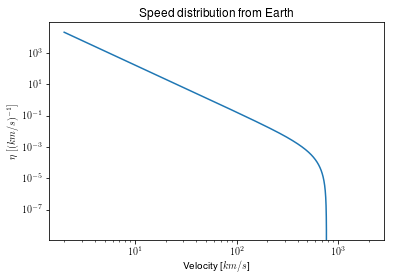

In [46]:
plt.loglog(velocity, [speed_integrated(i, v_esc, v_e, sigma) for i in velocity])
plt.title(r"Integrated speed distribution from Earth")
plt.ylabel(r"$\eta\ [(km/s)^{-1}]$")
plt.xlabel(r"Velocity [$km/s$]")
plt.show()

# The Differential Interaction Rate

There are still several variables that are unspecified in the differential interaction rate. 

$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi} \frac{\sigma^\text{SI}_p A^2 F^2(E_R)}{2 \mu_{\chi p}^2} \int_{v_\text{min}}^{v_\text{esc}} \frac{f(v)}{v} dv
$$

$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi} \frac{\sigma^\text{SI}_p A^2 F^2(E_R)}{2 \mu_{\chi p}^2} \eta(v_\text{min})
$$

In [10]:
def v_min(E_R, A, DM_mass):
    """
    Calculate the minimum velocity at which the energy can still create a recoil effect
    
    Input:
    - E_R:        Recoil Energy in GeV
    - A:          The atomic mass number of detector
    - DM_mass:    The mass of the WIMP in GeV
    """
    
    m_N = 0.9315*A # GeV Atomic number conversion
    mu = (m_N*DM_mass)/(m_N + DM_mass)
    return np.sqrt((m_N * E_R)/(2*mu**2))

In [11]:
def diff_int_rate(E_R, DM_mass, A, int_cross=1., v_esc=v_esc, v_earth=v_e, sigma=sigma):
    """
    Calculate the differential interaction rate. 
    
    Input:
    - E_R:        Recoil Energy in GeV
    - DM_mass:    The mass of the WIMP in GeV
    - int_cross:  Interaction cross section between the WIMP and a proton at zero momentum in cm^2
    - A:          The atomic mass number of detector
    - v_esc:      Escape velocity of the DM particles in km/s
    - v_earth:    The velocity of the earth in km/s
    - sigma:      Deviation in the velocity distribution in km/s
    
    Output:
    - dRdE:       Differential interaction rate in events day^-1 kg^-1 keV^-1
    """
    
    m_p = 0.9315 # GeV
    rho = 0.30 # ± 0.05 GeV / cm^3
    mu = (DM_mass * m_p)/ (DM_mass + m_p)
    v_m = v_min(E_R, A, DM_mass)
    dRdE = (rho/DM_mass * (int_cross * A**2 * FSquared(E_R, A))/(2*mu**2) * 
            speed_integrated(v_m,v_esc, v_earth, sigma)) # s cm^-1 km^-1 GeV^-2
    return dRdE*1E-19/(1.78E-36*2.9979E8)*24*3600 # day^-1 kg^-1 keV^-1

In [12]:
# recoil_energy = np.arange(10,110,10)
# A_Xe = 132
# for E in recoil_energy:
#     mDM = np.logspace(-1,4,1000)
#     dRdE_test = [diff_int_rate(E, m, A_Xe) for m in mDM]

#     plt.loglog(mDM,dRdE_test,label='E=%.0f GeV'%E)
#     plt.xlabel(r'$m_\chi\ [GeV]$')
#     plt.ylabel(r'${\sigma_{p}^{SI}}^{-1}*dR/dE\ [GeV^{-2}]$')
# plt.title('Xenon-132')
# plt.legend(ncol=2)
# plt.show()

In [13]:
# A_list = [132, 40, 74] # Don't know if this is corresponding with detector-usage. Sometimes I just took a isotope.
# Names = ['Xenon-132', 'Argon-40', 'Germanium-74']

# for i in range(3):
#     recoil_energy = np.arange(4.9E-6,40.9E-6,5E-6) # GeV. Don't know these values. These for XENON1T(?, arxiv:1805.12562)
#     for E in recoil_energy:
#         mDM = np.logspace(1,3,1000) # GeV
#         dRdE_test = [diff_int_rate(E, m, A_list[i]) for m in mDM]

#         plt.loglog(mDM,dRdE_test,label='E=%.2g GeV'%E)
#         plt.xlabel(r'$m_\chi\ [GeV]$')
#         plt.ylabel(r'$(1\ cm^2/\sigma_0)\ dR/dE\ [{\sigma_{p}^{SI}}\ GeV^{-2}]$')
#     plt.title(Names[i])
#     plt.legend(ncol=2)
#     plt.show()

In [14]:
A_list = [132, 40, 74] # Don't know if this is corresponding with detector-usage. Sometimes I just took a isotope.
Names = ['Xenon-132', 'Argon-40', 'Germanium-74']

E_recoil = np.linspace(2E-6,5E-3,10000)
DMmass = [10,50,100,500] #GeV

dRdE_test2 = [diff_int_rate(E, DMmass[2], A_list[0]) for E in E_recoil]

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


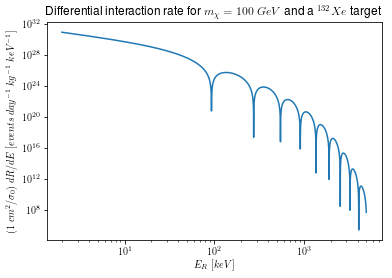

In [15]:
plt.loglog(E_recoil*1E6,dRdE_test2)
plt.xlabel(r'$E_R\ [keV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ dR/dE\ [events\ day^{-1}\ kg^{-1}\ keV^{-1}]$')
plt.title(r'Differential interaction rate for $m_\chi=100\ GeV$ and a ${}^{132}Xe$ target')
plt.show()

In [16]:
## ADD a test + plot the differential interaction rate
## For 3 different type of target masses (Xe, Ar, Ge)
## For different WIMP masses

# Integrated Interaction Rate

In [17]:
# Integrate the diff_int_rate from E_threshold upto E_max

$$
R=\int _{E_T}^{E_{max}}\frac{dR}{dE}
$$

$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi} \frac{\sigma^\text{SI}_p A^2 F^2(E_R)}{2 \mu_{\chi p}^2} \eta(v_\text{min})
$$

In [18]:
def rate(DM_mass, A, E_T, E_max, int_cross=1.):
    R = integrate.quad(lambda v: diff_int_rate(v, DM_mass, A, int_cross),E_T,E_max)
    return R

In [19]:
# mDM2 = np.logspace(1,3,20)
# R = [rate(m,132,5E-6,4E-5)[0] for m in mDM2]

In [20]:
# plt.loglog(mDM2,R)
# plt.xlabel(r'$m_\chi\ [GeV]$')
# plt.ylabel(r'$R\ [{\sigma_{p}^{SI}}GeV^{-1}]$')
# plt.show()

In [21]:
massDM = 100 # GeV
A_Xe = 132
E_thres = np.logspace(-6,-4,100)
rate_new = [rate(DM_mass = massDM, A=A_Xe, E_T=E, E_max = 1E-4, int_cross=1.)[0] for E in E_thres]

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


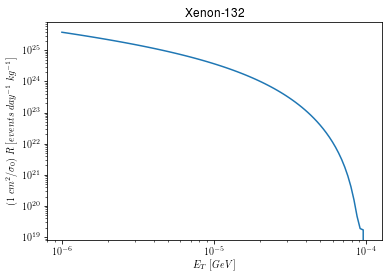

In [22]:
plt.loglog(E_thres,rate_new)
plt.xlabel(r'$E_T\ [GeV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ R\ [events\ day^{-1}\ kg^{-1}]$')
plt.title(r'Xenon-132')
plt.show()

# Spin-dependent Interaction

The spin-dependent part of the differential cross section is as follows: 

$$
\frac{d\sigma_\text{SD}}{dE_R} = \frac{m_N \sigma_p^\text{SD}}{2\mu_{\chi p}^2 v^2} \frac{2(J+1)}{3J} \left(\langle S_p \rangle + \frac{a_n}{a_p} \langle S_n \rangle \right)^2 F^2_\text{SD}(E_R)
$$
The $1/v^2$ can be removed, since it is taken into the integration of $v$ in $\eta$. It is often assumed that the coupling strength between protons and neutrons is the same ($a_n = a_p$) and the form factor can be rewritten as a combination of spin structure values giving us: 

$$
\frac{d\sigma_\text{SD}}{dE_R} = \frac{8 \pi m_N \sigma_p^\text{SD}}{3\mu_{\chi p}^2} \frac{S_{00}(E_R)}{(2J+1)}
$$
with

$$
S_{ij} = N((1-\beta)e^{-\alpha u} + \beta)
$$
where $\alpha, \beta, N$ are parameters, while $u$ can be calculated with 

$$
u = \frac{(qb)^2}{2}, \quad b = \sqrt{\frac{41.467}{(45.0A^{-1/3} -25.0A^{-2/3})}}\text{  fm.}
$$
Here $q$ is the momentum transfer
$$
q=\sqrt{2m_NE_R}.
$$

This can be used to calculate the SD differential interaction rate
$$
\frac{dR}{dE} = \frac{\rho_0}{m_\chi m_N} \frac{d\sigma_{SD}}{dE_R} \eta (v_{min})
$$


## Spin structure 

In [23]:
def diff_cross_section(E_R, A, J, parameters, DM_mass, int_cross=1.):
    """
    Calculation of the spin dependent differential cross section.
    
    Input:
    - E_R:        Recoil Energy in GeV
    - A:          The atomic mass number of the detector
    - J:          The spin of the atoms in the detector
    - parameters: Detector dependent parameter
    - DM_mass:    The mass of the dark matter particles in GeV
    - int_cross:  Interaction cross section between the WIMP and a proton at zero momentum in cm^2
    
    Output:
    - Spin dependent differential cross section
    """
    
    [alpha, beta, N] = parameters
    
    m_N = .9315 * A # GeV
    m_p = .9315 # GeV
    mu = (DM_mass**2 + m_p**2)/(DM_mass*m_p)
    
    q = np.sqrt(2*m_N*E_R) # GeV
    b = np.sqrt(41.467/(45*A**(-1/3) -25*A**(-2/3))) # fm
    b_NU = b/0.1975 # GeV^-1
    u = (q*b_NU)**2/2 # No unit
    
    S = N*((1-beta)*np.exp(-alpha*u) + beta) # No unit
    
    dSigma_dE = 8*np.pi*m_N*int_cross/(3*mu**2) * S / (2*J+1) # cm^2 / GeV
    
    return dSigma_dE

In [24]:
def SD_diff_int_rate(E_R, A, J, parameters, DM_mass, v_esc, v_earth, sigma, int_cross=1.):
    """
    Calculate the spin dependent differential interaction rate. 
    
    Input:
    - E_R:        Recoil Energy in GeV
    - A:          The atomic mass number of the detector
    - J:          The spin of the atoms in the detector
    - parameters: Detector dependent parameter
    - DM_mass:    The mass of the dark matter particles in GeV
    - v_esc:      Escape velocity of the DM particles in km/s
    - v_earth:    The velocity of the earth in km/s
    - sigma:      Deviation in the velocity distribution in km/s
    - int_cross:  Interaction cross section between the WIMP and a proton at zero momentum in cm^2
    
    Output:
    SD differential interaction rate in events day^-1 kg^-1 keV^-1
    """
    
    rho = 0.30 # ± 0.05 GeV / cm^3
    m_N = 0.9315 * A # GeV
    
    v_m = v_min(E_R, A, DM_mass)
    dRdE = (rho/(DM_mass*m_N) * diff_cross_section(E_R, A, J, parameters, DM_mass, int_cross) * 
            speed_integrated(v_m,v_esc, v_earth, sigma)) # s cm^-1 km^-1 GeV^-2
    
    return dRdE*1E-19/(1.78E-36*2.9979E8)*24*3600 # day^-1 kg^-1 keV^-1

In [25]:
para = [0.0595, 3.75, 0.0096] # for Xe-129
A = 129 # for Xe-129
J = 1/2 # for Xe-129
DM_mass = 100 # GeV

SD_recoil = np.linspace(2E-6,5E-3,10000)
dR_dE_SD = [SD_diff_int_rate(E_R, A, J, para, DM_mass, v_esc, v_e, sigma) for E_R in SD_recoil]

c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


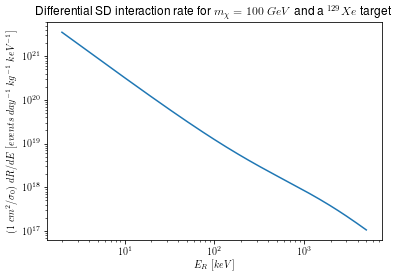

In [26]:
plt.loglog(SD_recoil*1E6,dR_dE_SD)
plt.xlabel(r'$E_R\ [keV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ dR/dE\ [events\ day^{-1}\ kg^{-1}\ keV^{-1}]$')
plt.title(r'Differential SD interaction rate for $m_\chi=100\ GeV$ and a ${}^{129}Xe$ target')
plt.show()

# New try

\begin{align}
    &R = \int_{E_T}^\infty dE_R\dfrac{\rho_0}{m_Nm_\chi}\int_{v_{min}}^\infty vf(v)\dfrac{d\sigma_{WN}}{dE_R}dv\\
    &v_{min} = \sqrt{\dfrac{m_NE_R}{2\mu_N^2}}\\
    &\mu_N = \dfrac{m_\chi m_N}{m_\chi + m_N}
\end{align}

\begin{align}
    \sigma_0 &= \dfrac{4\mu_N^2}{\pi}\left[Zf^p+(A-Z)f^n\right]^2\\
    \sigma_{0,P} &= \dfrac{4\mu_N^2}{\pi} \left(f^p\right)^2\\
    \left(f^p\right)^2 &= \dfrac{\pi}{4\mu_N^2} \sigma_{0,P}
\end{align}
where $\mu_N=m_\chi m_N/\left(m_\chi+m_N\right)$

\begin{align}f^p&=f^n\\\sigma_0 &= \dfrac{4\mu_N^2}{\pi}\left[Zf^p+(A-Z)f^p\right]^2 \\&= \dfrac{4\mu_N^2}{\pi}\left[A f^p\right]^2\\&=\dfrac{4\mu_N^2A^2}{\pi}\left[f^p\right]^2\\
&=\dfrac{4\mu_N^2A^2}{\pi}\dfrac{\pi}{4\mu_N^2} \sigma_{0,P}\\
&=A^2\sigma_{0,P}\end{align}

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# from scipy import special,integrate
# from matplotlib import rc

In [28]:
# def N_esc(v_esc, sigma):
#     a = v_esc**2/(2*sigma**2)
#     return special.erf(np.sqrt(a))  - np.sqrt(2/np.pi) * v_esc/sigma *np.exp(-a)

# def speed_dist(v, v_e, sigma, v_esc):
#     factor = v / (np.sqrt(np.pi*2)*sigma*v_e*N_esc(v_esc, sigma))
    
#     if v > v_esc+v_e:
#         return 0 
#     elif v < v_esc-v_e:
#         return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-(v+v_e)**2/(2*sigma**2)))
#     else:
#         return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-v_esc**2/(2*sigma**2)))

In [29]:
# A=130 # Atomic mass number
# m_N = A*1.660539E-27 #kg. Mass of detector target
# m_chi = 100 * 1.780E-27 #kg. Mass of WIMP
# mu_N = m_chi*m_N/(m_chi+m_N) #kg. Reduced mass
# sigma = 270 #km/s
# v_e = 220 #km/s
# v_esc = 550 #km/s

# def pdf(v):
#     return 1/ np.sqrt(2*np.pi*sigma**2) * np.exp(- np.abs(v)**2 / (2* sigma**2))

# def vmin(E_R=np.nan):
#     v_min = math.sqrt(m_N*E_R/(2*mu_N**2))
#     return v_min

In [30]:
# def FSquared2(E_R, A):
#     s=1 #fm
#     R=1.2*math.sqrt(A) #fm
#     R1=math.sqrt(R**2-5*s**2) #fm
#     j_n=special.spherical_jn(1,E_R*R1) #No unit
#     return (3*j_n/(E_R*R1))**2*math.exp(-E_R**2*s**2) #No unit

In [31]:
# def dSigma_dE_SI(E_R,v):
#     sigma_0 = A**2 #sigma_0,proton
#     return m_N*sigma_0*FSquared2(E_R,A)/(2*mu_N**2*v**2) #sigma_0,proton / Joule

\begin{align} R = \int_{E_T}^\infty dE_R\dfrac{\rho_0}{m_Nm_\chi}\int_{v_{min}}^\infty vf(v)\dfrac{d\sigma_{WN}}{dE_R}dv \end{align}

In [32]:
# def integrant(E_R,v):
#     integr = v*speed_dist(v, v_e, sigma, v_esc)*dSigma_dE_SI(E_R,v)
#     return integr

In [33]:
#integrant(4,4)


In [34]:
#E_T = 4*1.6021773E-22
#integrate.dblquad(integrant, E_T, 100*1.6021773E-22, lambda x:vmin(x), lambda x:v_esc)

In [35]:
# R = 0
# start = 4*1.6021773E-22
# finish = 100*1.6021773E-10
# steps = 10000
# dE = (finish-start)/steps
# ER_list = np.linspace(start, finish, steps)
# for E in ER_list:
#     integr = integrate.quad(lambda v: integrant(E,v),vmin(E),v_esc)
#     R += integr[0] * dE
    
# print("R =%.2g x SIGMA_0,proton"%(R))

In [36]:
# R_oud=R

In [37]:
# (R-R_oud)/R